# Step Test: Experiment

## Executing the Step Test

### Verify an Initial Steady State

A step test assumes the system is initially at steady state. In the case of the Temperature Control Lab, the initial steady with no power input would be room temperature. It generally takes 10 minutes or more to reach steady state. We'll do a measurement to confirm the initial temperature.

In [1]:
from tclab import TCLab, clock, Historian

a = TCLab()
print(a.T1,a.T1)
a.close()

Connecting to TCLab.
Stop (Arduino Leonardo)  on port /dev/cu.usbmodemWUAR1 at 115200 baud.
23.8 23.8
TCLab disconnected successfully.


### Conduct the Experiment

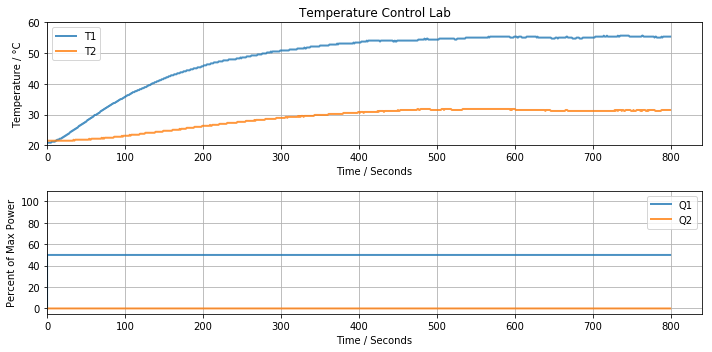

TCLab disconnected successfully.


In [2]:
# experimental parameters
Q1 = 50
tfinal = 800

# perform experiment
with TCLab() as a:
    h = Historian(a)
    h.initplot(tfinal)
    a.Q1(Q1)
    for t in clock(tfinal,strict=True):
        h.update(t)

### Verify the Experimental Data

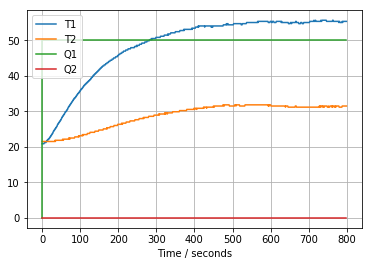

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

t = h.t
T1 = h.T1
T2 = h.T2
Q1 = h.Q1
Q2 = h.Q2

plt.plot(t,T1,t,T2,t,Q1,t,Q2)
plt.legend(['T1','T2','Q1','Q2'])
plt.xlabel('Time / seconds')
plt.grid()

### Convert to a DataFrame

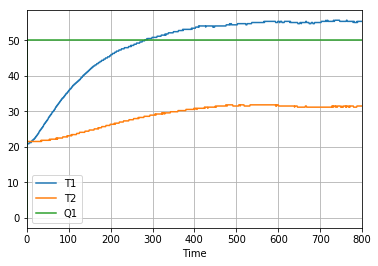

In [4]:
import pandas as pd

df = pd.DataFrame([t,T1,T2,Q1]).T
df.columns = ['Time','T1','T2','Q1']
df = df.set_index('Time')
df.plot(grid=True)

### Save DataFrame as a .csv file

In [5]:
df.to_csv('Step_Test_Data.csv')

### Verify the Data File

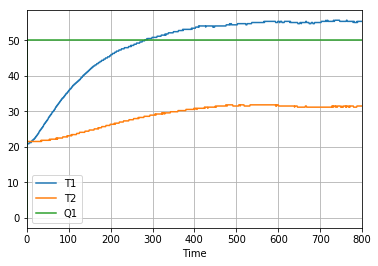

In [2]:
%matplotlib inline
import pandas as pd

pd.read_csv('Step_Test_Data.csv').set_index('Time').plot(grid=True)

In [7]:
df.head()

,T1,T2,Q1
Time,,,
0.0,20.9,21.54,0.0
0.0,20.9,21.54,50.0
1.0,20.9,21.54,50.0
2.0,20.9,21.54,50.0
3.0,20.9,21.54,50.0


In [8]:
df.tail()

,T1,T2,Q1
Time,,,
795.00,55.38,31.53,50.0
796.00,55.38,31.53,50.0
797.00,55.38,31.53,50.0
798.01,55.38,31.53,50.0
799.00,55.38,31.53,50.0
